## Objective

This notebook performs Exploratory Data Analysis (EDA) on the merged dataset (cleaned_merged.csv) to understand Azure compute and storage usage patterns and how they relate to external factors such as market demand, economic index, and seasonality.

The main goals are to:

*   Validate and clean the dataset for consistency.
*   Explore usage trends across time, regions, and resources.

*  Identify potential correlations between internal usage metrics and external influencing factors.

* Detect outliers, anomalies, and seasonality in demand.  






## Import Libraries & Load Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [4]:
df = pd.read_csv('/content/cleaned_merged.csv')

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
print("Data Loaded Successfully")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Data Loaded Successfully
Rows: 1080, Columns: 9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 1080 non-null   datetime64[ns]
 1   region               1080 non-null   object        
 2   resource_type        1080 non-null   object        
 3   usage_cpu            1080 non-null   int64         
 4   usage_storage        1080 non-null   int64         
 5   users_active         1080 non-null   int64         
 6   economic_index       1080 non-null   float64       
 7   cloud_market_demand  1080 non-null   float64       
 8   holiday              1080 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 76.1+ KB


In [8]:
df.describe()

,date,usage_cpu,usage_storage,users_active,economic_index,cloud_market_demand,holiday
count,1080,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,2023-02-14 12:00:00,74.651852,1242.477778,352.694444,98.930444,1.006667,0.277778
min,2023-01-01 00:00:00,50.000000,500.000000,200.000000,73.800000,0.800000,0.000000
25%,2023-01-23 00:00:00,62.000000,881.750000,283.000000,92.980000,0.940000,0.000000
50%,2023-02-14 12:00:00,75.000000,1262.000000,353.000000,99.645000,1.015000,0.000000
75%,2023-03-09 00:00:00,87.000000,1609.000000,427.000000,103.610000,1.080000,1.000000
max,2023-03-31 00:00:00,99.000000,1995.000000,499.000000,118.860000,1.270000,1.000000
std,NaN,14.549621,432.444284,86.280150,8.779973,0.100998,0.448111


In [9]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 date                   0
region                 0
resource_type          0
usage_cpu              0
usage_storage          0
users_active           0
economic_index         0
cloud_market_demand    0
holiday                0
dtype: int64


Correlation Analysis

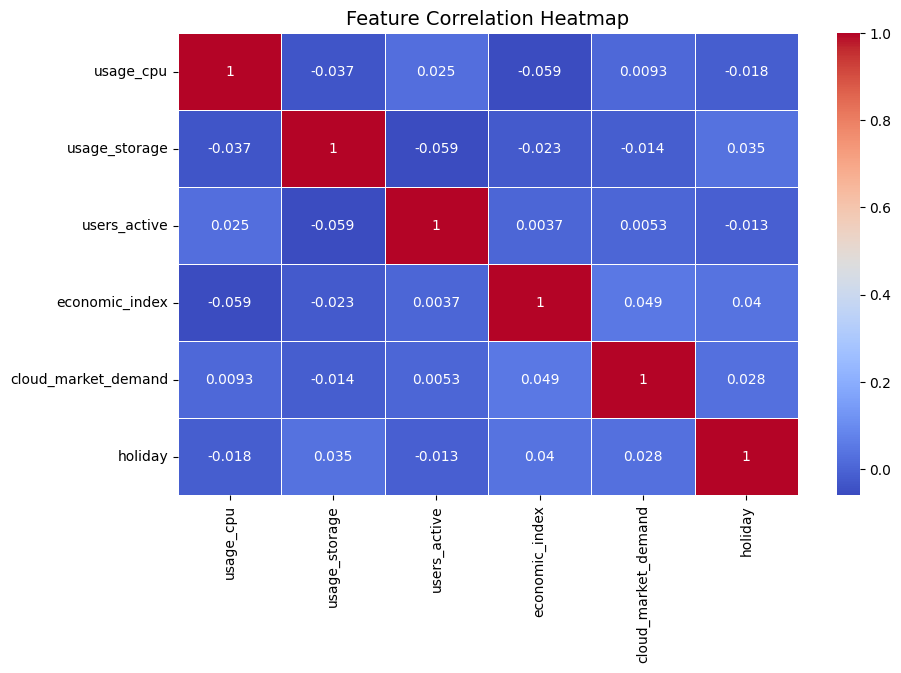

In [10]:
# Convert relevant columns to numeric, coercing errors to NaN
df['usage_cpu'] = pd.to_numeric(df['usage_cpu'], errors='coerce')
df['usage_storage'] = pd.to_numeric(df['usage_storage'], errors='coerce')
df['users_active'] = pd.to_numeric(df['users_active'], errors='coerce')
df['economic_index'] = pd.to_numeric(df['economic_index'], errors='coerce')
df['cloud_market_demand'] = pd.to_numeric(df['cloud_market_demand'], errors='coerce')

plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

Time-Series Trend Analysis

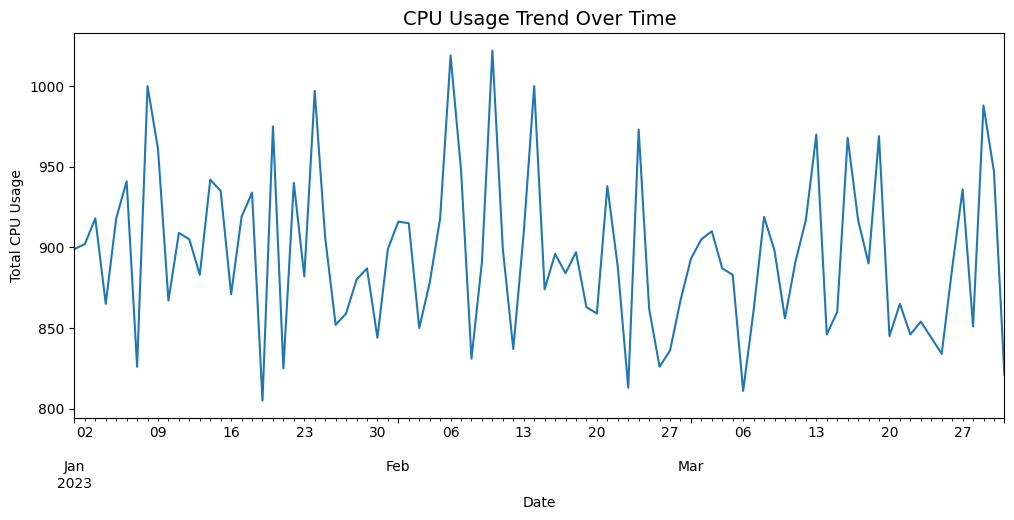

In [11]:
plt.figure(figsize=(12, 5))
df.groupby('date')['usage_cpu'].sum().plot()
plt.title("CPU Usage Trend Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total CPU Usage")
plt.show()

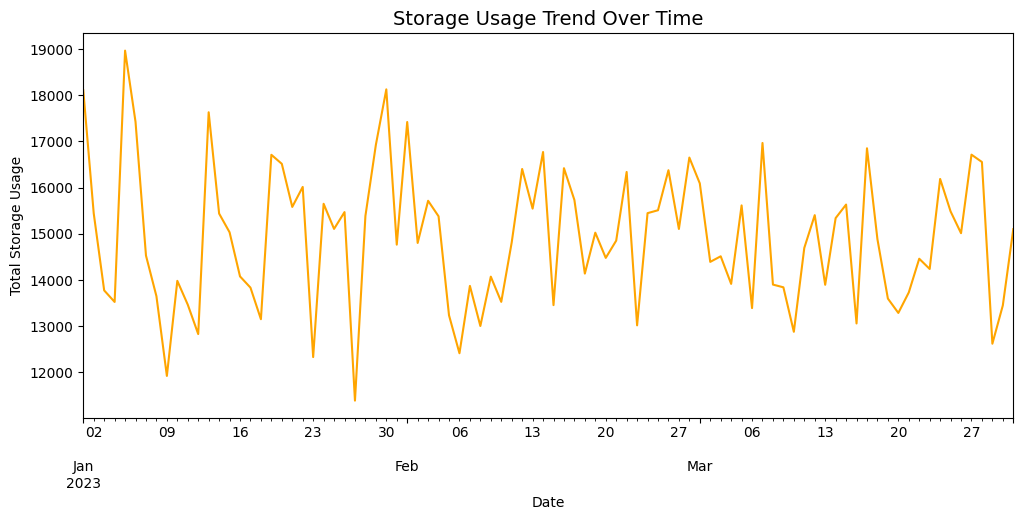

In [12]:
plt.figure(figsize=(12, 5))
df.groupby('date')['usage_storage'].sum().plot(color='orange')
plt.title("Storage Usage Trend Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Storage Usage")
plt.show()

Regional Usage Variation

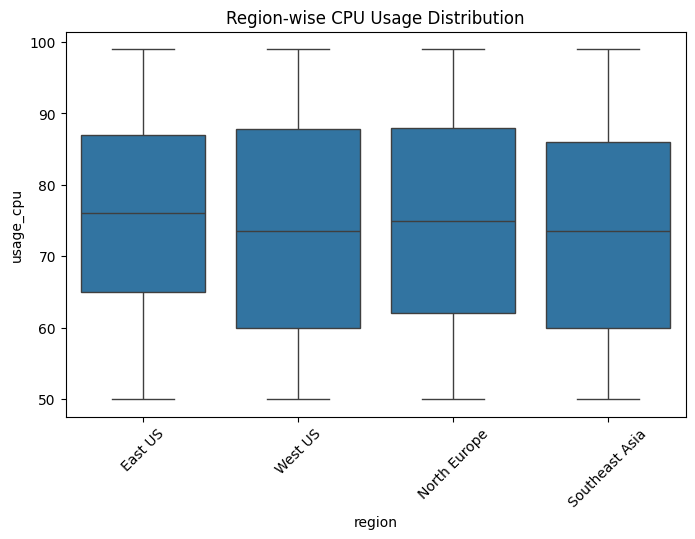

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='region', y='usage_cpu')
plt.title("Region-wise CPU Usage Distribution")
plt.xticks(rotation=45)
plt.show()

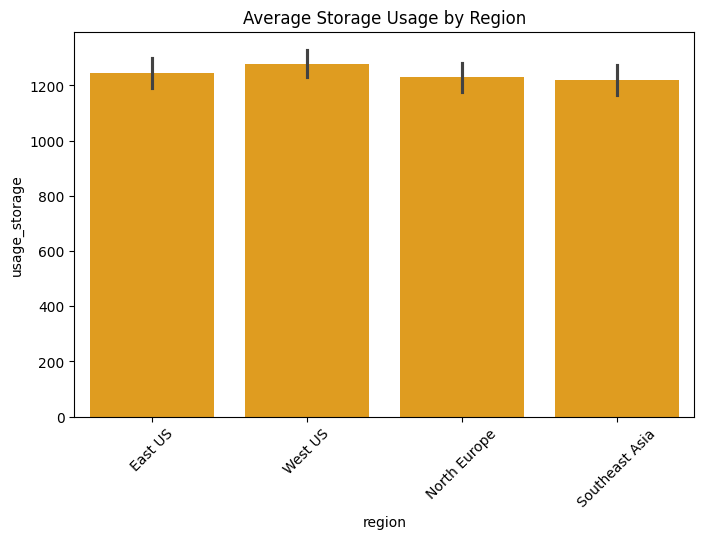

In [14]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='region', y='usage_storage', estimator=np.mean,color='orange')
plt.title("Average Storage Usage by Region")
plt.xticks(rotation=45)
plt.show()

External Factors Influence

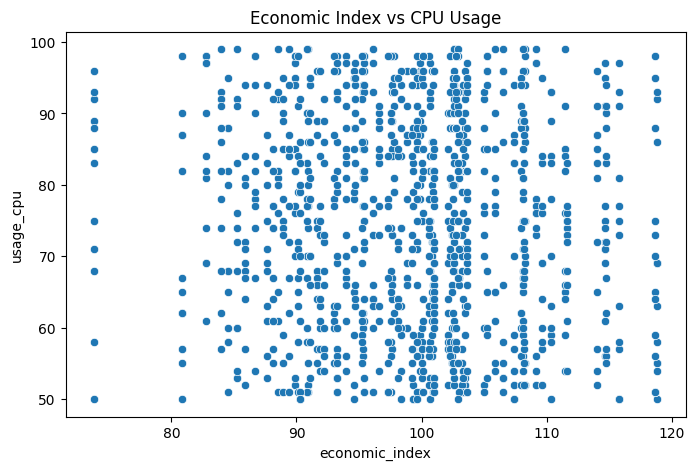

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='economic_index', y='usage_cpu')
plt.title("Economic Index vs CPU Usage")
plt.show()

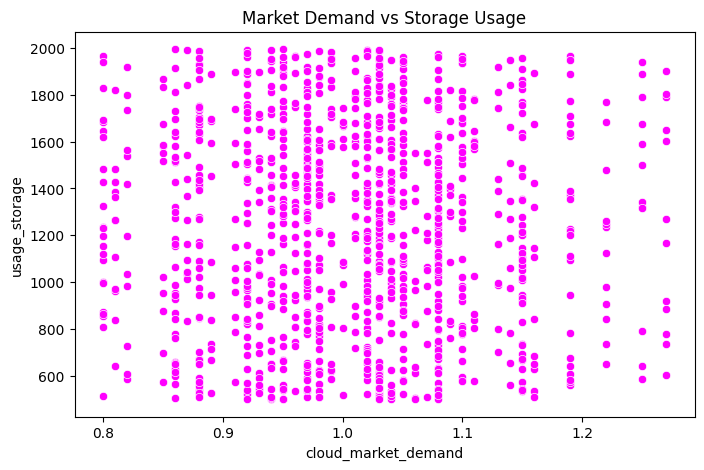

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='cloud_market_demand', y='usage_storage',color='magenta')
plt.title("Market Demand vs Storage Usage")
plt.show()

Outlier Detection

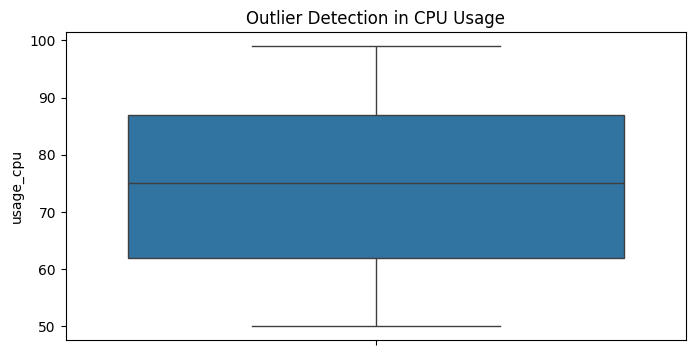

In [17]:
plt.figure(figsize=(8, 4))
sns.boxplot(df['usage_cpu'])
plt.title("Outlier Detection in CPU Usage")
plt.show()

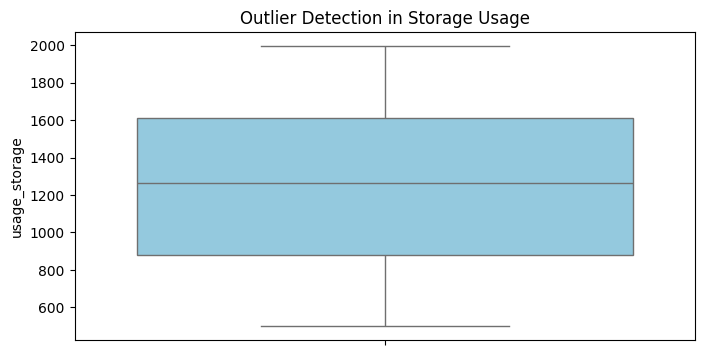

In [18]:
plt.figure(figsize=(8, 4))
sns.boxplot(df['usage_storage'],color='skyblue')
plt.title("Outlier Detection in Storage Usage")
plt.show()

Peak Usage Analysis

/tmp/ipython-input-4106980097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_days.index, y=top_days.values, palette="viridis")


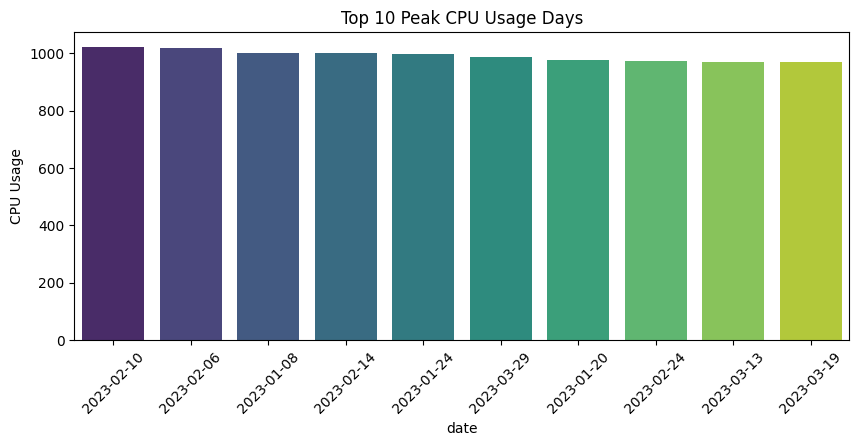

In [19]:
top_days = df.groupby('date')['usage_cpu'].sum().nlargest(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=top_days.index, y=top_days.values, palette="viridis")
plt.title("Top 10 Peak CPU Usage Days")
plt.xticks(rotation=45)
plt.ylabel("CPU Usage")
plt.show()

In [20]:
df.to_csv(r'C:\azure-demand-forecasting\data\processed\cleaned_azure_usage.csv', index=False)
print(" Saved as cleaned_azure_usage.csv")

 Saved as cleaned_azure_usage.csv
